### Q3

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support

In [2]:
dataset = pd.read_csv("input\P3\crx.data")
dataset.head(25)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [3]:
dataset.describe()

,0,1.25,01,0.1
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


In [4]:
dataset.shape

(689, 16)

In [5]:
dataset.tail(25)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
664,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,00000,0,-
665,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,00180,0,-
666,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,00080,5,-
667,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,00252,0,-
668,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,00120,1,-
669,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
670,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
671,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
672,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
673,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-


### Missing values

### Calculate NaN

In [6]:
dataset.dtypes

b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202     object
0.1        int64
+         object
dtype: object

In [7]:
dataset.columns

Index(['b', '30.83', '0', 'u', 'g', 'w', 'v', '1.25', 't', 't.1', '01', 'f',
       'g.1', '00202', '0.1', '+'],
      dtype='object')

In [8]:
dataset['b'] = dataset['b'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['b'].replace(['a', 'b'],[1, 2], inplace=True)
dataset['b'] = pd.to_numeric(dataset['b'])
dataset['b'].fillna(dataset['b'].mean(), inplace=True)

In [9]:
dataset['30.83'] = dataset['30.83'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['30.83'] = pd.to_numeric(dataset['30.83'])
dataset['30.83'].fillna(dataset['30.83'].mean(), inplace=True)

In [10]:
# dataset['0'] = dataset['0'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['0'] = pd.to_numeric(dataset['0'])
dataset['0'].fillna(dataset['0'].mean(), inplace=True)

In [11]:
dataset['u'] = dataset['u'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['u'].replace(['u', 'y', 'l'],[1, 2, 3], inplace=True)
dataset['u'] = pd.to_numeric(dataset['u'])
dataset['u'].fillna(dataset['u'].mean(), inplace=True)

In [12]:
dataset['g'] = dataset['g'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['g'].replace(['g', 'p', 'gg'],[1, 2, 3], inplace=True)
dataset['g'] = pd.to_numeric(dataset['g'])
dataset['g'].fillna(dataset['g'].mean(), inplace=True)

In [13]:
dataset['w'] = dataset['w'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['w'].replace(['q', 'w','m','r','cc','k','c','d','x','i','e','aa','ff','j'],[
    1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
dataset['w'] = pd.to_numeric(dataset['w'])
dataset['w'].fillna(dataset['w'].mean(), inplace=True)

In [14]:
dataset['v'] = dataset['v'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['v'].replace(['h', 'v','ff','j','z','o','dd','n','bb'],[1,2,3,4,5,6,7,8,9], inplace=True)
dataset['v'] = pd.to_numeric(dataset['v'])
dataset['v'].fillna(dataset['g'].mean(), inplace=True)

In [15]:
# dataset['1.25'] = dataset['1.25'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['1.25'] = pd.to_numeric(dataset['1.25'])
dataset['1.25'].fillna(dataset['1.25'].mean(), inplace=True)

In [16]:
# dataset['t'] = dataset['v'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['t'].replace(['f', 't'],[1, 2], inplace=True)
dataset['t'] = pd.to_numeric(dataset['t'])
dataset['t'].fillna(dataset['t'].mean(), inplace=True)

In [17]:
# dataset['t.1'] = dataset['t.1'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['t.1'].replace(['f', 't'],[1, 2], inplace=True)
dataset['t.1'] = pd.to_numeric(dataset['t.1'])
dataset['t.1'].fillna(dataset['t.1'].mean(), inplace=True)

In [18]:
# dataset['01'] = dataset['01'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['01'] = pd.to_numeric(dataset['01'])
dataset['01'].fillna(dataset['01'].mean(), inplace=True)

In [19]:
# dataset['f'] = dataset['f'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['f'].replace(['f', 't'],[1, 2], inplace=True)
dataset['f'] = pd.to_numeric(dataset['f'])
dataset['f'].fillna(dataset['f'].mean(), inplace=True)

In [20]:
# dataset['g.1'] = dataset['g.1'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['g.1'].replace(['g', 's', 'p'],[1, 2, 3], inplace=True)
dataset['g.1'] = pd.to_numeric(dataset['g.1'])
dataset['g.1'].fillna(dataset['g.1'].mean(), inplace=True)

In [21]:
dataset['00202'] = dataset['00202'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['00202'] = pd.to_numeric(dataset['00202'])
dataset['00202'].fillna(dataset['00202'].mean(), inplace=True)

In [22]:
# dataset['0.1'] = dataset['0.1'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['0.1'] = pd.to_numeric(dataset['0.1'])
dataset['0.1'].fillna(dataset['0.1'].mean(), inplace=True)

In [23]:
dataset['+'] = dataset['+'].map(lambda x: x.lstrip('?').rstrip(''))
dataset['+'].replace(['+','-'],[0,1], inplace=True)
dataset['+'] = pd.to_numeric(dataset['+'])
print(dataset['+'].isna().sum())
# dataset['0.1'].fillna(dataset['0.1'].mean(), inplace=True)
dataset['+']

0


0      0
1      0
2      0
3      0
4      0
      ..
684    1
685    1
686    1
687    1
688    1
Name: +, Length: 689, dtype: int64

In [24]:
y_binary = dataset['+'].copy()
x = dataset.drop(columns='+')

dataset['+'].replace([0,1],[-1,1], inplace=True)
y_svm = dataset['+']

In [25]:
y_binary

0      0
1      0
2      0
3      0
4      0
      ..
684    1
685    1
686    1
687    1
688    1
Name: +, Length: 689, dtype: int64

In [26]:
y_svm

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
684    1
685    1
686    1
687    1
688    1
Name: +, Length: 689, dtype: int64

In [27]:
print(x.isna().sum())

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
01       0
f        0
g.1      0
00202    0
0.1      0
dtype: int64


In [28]:
print(y_binary.isna().sum())

0


### normalization

In [29]:
normalized_x = (x - x.mean()) / x.std()
normalized_x

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1
0,-1.503310,2.284697,-0.061391,-0.562134,-0.562134,-1.552765,-0.744659,0.243429,0.955281,1.158269,0.739382,-0.919758,-0.308279,-0.818352,-0.088010
1,-1.503310,-0.595966,-0.856816,-0.562134,-0.562134,-1.552765,-0.744659,-0.216445,0.955281,-0.862104,-0.493618,-0.919758,-0.308279,0.557291,-0.037375
2,0.676007,-0.315234,-0.647916,-0.562134,-0.562134,-1.291667,-0.285002,0.455450,0.955281,1.158269,0.533882,1.085664,-0.308279,-0.487501,-0.194843
3,0.676007,-0.961002,0.172617,-0.562134,-0.562134,-1.291667,-0.285002,-0.153735,0.955281,-0.862104,-0.493618,-0.919758,2.601371,-0.371413,-0.195419
4,0.676007,0.043057,-0.153788,-0.562134,-0.562134,-1.030569,-0.285002,0.082175,0.955281,-0.862104,-0.493618,1.085664,-0.308279,1.021644,-0.195419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.676007,-0.884285,1.068475,1.736892,1.736892,1.058215,-0.744659,-0.291100,-1.045293,-0.862104,-0.493618,-0.919758,-0.308279,0.441203,-0.195419
685,-1.503310,-0.750242,-0.806599,-0.562134,-0.562134,0.013823,-0.285002,-0.067135,-1.045293,1.158269,-0.082618,1.085664,-0.308279,0.092939,-0.119849
686,-1.503310,-0.532738,1.754428,1.736892,1.736892,1.580411,0.174656,-0.067135,-1.045293,1.158269,-0.288118,1.085664,-0.308279,0.092939,-0.195227
687,0.676007,-1.150686,-0.916071,-0.562134,-0.562134,1.319313,-0.285002,-0.652430,-1.045293,-0.862104,-0.493618,-0.919758,-0.308279,0.557291,-0.051568


### outlier detection using K-Means

3
5
10
11
13
14
15
17
20



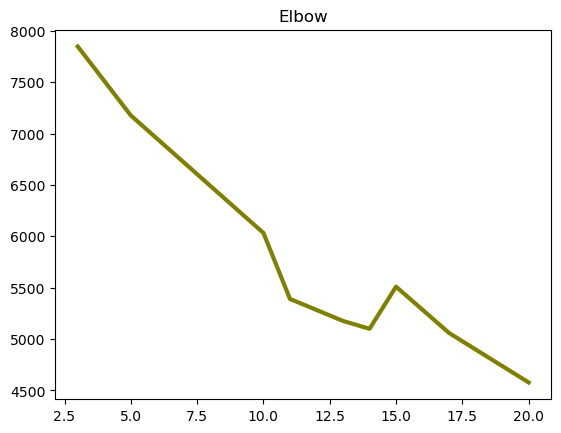

In [30]:
import math
import random
def merging(start: np.ndarray, end: np.ndarray, metric, convergence_ratio=0.01) -> bool:
    x_check = start - end
    if convergence_ratio > metric(x_check):
        return True
    return False
def predict(self, X):
    self.centroids = np.zeros((self.K, self.n_features))
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    for i in range(self.K):
        self.centroids[i, :] = X_train[random.randint(0, int(460) - 1), :]
def KMeans(X_train: pd.DataFrame, ClusterCount, iteration, ConvergenceRatio, DistanceMetric) -> list:
    init_centers = np.zeros((ClusterCount, X_train.shape[1]))
    sum_value = 0
    if DistanceMetric == 'CityBlock':
        metric = CityBlock
    elif DistanceMetric == 'Euclidean':
        metric = Euclidian
    else:
        return -1
    for i in range(ClusterCount):
        init_centers[i, :] = X_train[random.randint(0, X_train.shape[0] - 1), :]
    def all_labels(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X.iloc[cluster,:], axis=0)
            centroids[cluster_idx] = cluster_mean
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.centroids = np.zeros((self.K, self.n_features))
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    while True:
        sum_value += 1
        cluster_lists = []
        for i in range(ClusterCount):
            cluster_lists.append(set())
        for i in range(X_train.shape[0]):
            evaluation_metric = []
            for center_index in range(ClusterCount):
                evaluation_metric.append(metric(X_train[i, :] - init_centers[center_index, :]))
            evaluation_metric = np.array(evaluation_metric)
            min_cluster_index = np.where(evaluation_metric == evaluation_metric.min())[0][0]
            cluster_lists[min_cluster_index].add(i)
        new_centers = np.zeros((ClusterCount, X_train.shape[1]), dtype=float)
        for i in range(ClusterCount):
            sum_vectors = np.zeros(X_train.shape[1])
            for row_number in cluster_lists[i]:
                sum_vectors += X_train[row_number, :]
            if len(cluster_lists[i]) != 0:
                new_centers[i, :] = sum_vectors / len(cluster_lists[i])
            else:
                new_centers[i, :] = X_train[random.randint(0, X_train.shape[1] - 1), :] 
        if merging(init_centers, new_centers, metric, convergence_ratio=ConvergenceRatio):
            init_centers = new_centers
            break
        init_centers = new_centers
        if sum_value >= iteration:
            break
    return init_centers
from numpy import array
def d(center, data):
    return np.sqrt(np.sum(((center - data) ** 2), axis=1))

def calculate_purity(y, y_specific):
    unique_values = np.unique(y)
    purity = 0
    for val in unique_values:
        cluster_index = np.where(array(y) == val)[0]
        most_frequent_label = y_specific[cluster_index].mode()[0]
        purity += y_specific[cluster_index][y_specific[cluster_index] == most_frequent_label].shape[0]
    purity /= len(y)
    return round(purity, 3)

def label_handler(d, data, center):
    result = []
    for center in center:
        result.append(d(center, data))
    return [np.argmin(x) for x in array(result).T], array(result).T.min(axis=1)

def calculate_entropy(y, predict):
    u,e = np.unique(y),0
    for i in u:
        e += -(len(np.where(array(y) == i)[0]) / len(y)) * np.sum(
            list(map(lambda x: (x / len(np.where(array(y) == i)[0])) * np.log2(
                x / len(np.where(array(y) == i)[0])), predict[np.where(
                array(y) == i)[0]].value_counts().tolist())))
    return round(e, 3)

def calculate_acc(x, predict):
    labels, _ = label_handler(d, x, answer)
    u,count = np.unique(labels),0
    for val in u:
        count += predict[np.where(array(
            labels) == val)[0]][predict[np.where(array(
            labels) == val)[0]] == predict[np.where(array(labels) == val)[0]].mode()[0]].shape[0]
    return round(count / x.shape[0], 3)

def CityBlock(input: np.ndarray):
    return np.sum(np.abs(input))

def Euclidian(input: np.ndarray):
    return math.sqrt(np.sum(np.power(input, 2)))

def estimator(array: list):
    return np.sum(np.power(np.array(array), 2))

def distance_for_clusters(input: np.ndarray, points: np.ndarray, d):
    result_array = []
    for i in range(points.shape[0]):
        result_array.append(d(input - points[i, :]))
    return np.array(result_array).min(), np.where(result_array == np.array(result_array))[0][0]

def sample_handler(input_val):
    for i, j in input_val.iterrows():
        clusters[centroids._closest_centroid(j, centroids)].append(i)
    return clusters

result_part_c , K_array = [],[3,5,10,11,13,14,15,17,20]
for value in K_array:
    print(value)
    points,distances = KMeans(normalized_x.to_numpy(), value,30,0.01,DistanceMetric = 'CityBlock'),[]
    for i in range(normalized_x.to_numpy().shape[0]):
        mininmum, index = distance_for_clusters(normalized_x.to_numpy()[i, :], points, Euclidian)
        distances.append(mininmum)
    result_part_c.append(estimator(distances))
print("")
plt.title('Elbow')
plt.plot(K_array, result_part_c, color= "olive" , linewidth = "3")
plt.show()

C:\Users\mmmoh\AppData\Local\Temp\ipykernel_13564\3268212936.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(1, normalized_x.to_numpy().shape[0] + 1), sorted(distances


Text(0.5, 1.0, 'K=10')

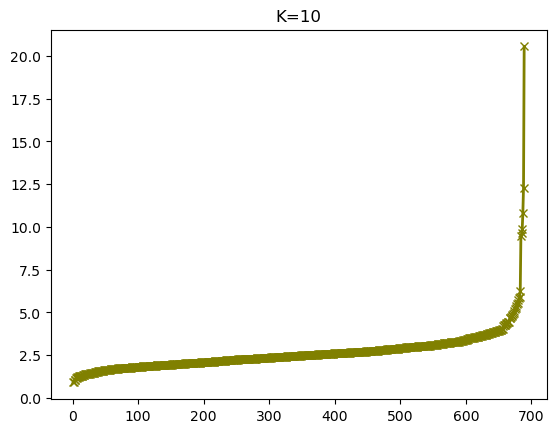

In [31]:
points,distances = KMeans(normalized_x.to_numpy(), 10, 30, 0.01,DistanceMetric = 'CityBlock'),[]
for i in range(normalized_x.to_numpy().shape[0]):
    minimum, index = distance_for_clusters(normalized_x.to_numpy()[i, :], points, Euclidian)
    distances.append(minimum)
plt.plot(np.arange(1, normalized_x.to_numpy().shape[0] + 1), sorted(distances
                                                        ), 'bx-', linewidth = 2, color = "olive")
plt.title('K=10')

In [32]:
count,optimal_limit = 0, 13
for value in range(normalized_x.to_numpy().shape[0]):
    if value < 683:
        limit, _ = distance_for_clusters(normalized_x.to_numpy()[value, :], points, Euclidian)
    #     print(limit)
        if limit > optimal_limit:
            count += 1
            normalized_x.drop(value, axis=0, inplace=True)
            y_binary.drop(value, axis=0, inplace=True)
            y_svm.drop(value, axis=0, inplace=True)
print("Outlier percentage: ", count / normalized_x.to_numpy().shape[0] * 100 )

Outlier percentage:  0.14534883720930233


In [68]:
X_train,X_test, y_train, y_test = train_test_split(normalized_x, y_binary, test_size=0.15, random_state=55)

In [69]:
print("x_train: ",X_train.shape,"     y_train: ", y_train.shape )
print("x_test: ",X_test.shape,"     y_test: ", y_test.shape )

x_train:  (584, 15)      y_train:  (584,)
x_test:  (104, 15)      y_test:  (104,)


In [70]:
y_test

626    1
175    0
88     1
254    1
183    0
      ..
196    0
450    1
472    1
636    1
411    1
Name: +, Length: 104, dtype: int64

In [71]:
import timeit
# timeit.timeit()

### Part B:

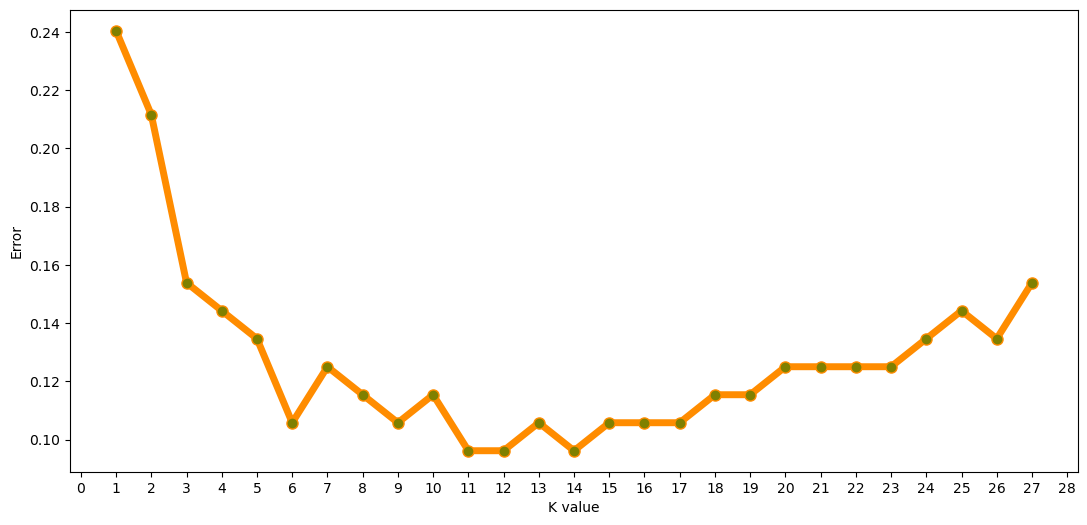

In [72]:
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
error = []
tick_spacing = 1
for i in range(1,28):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
fig, ax = plt.subplots(1, 1,figsize=(13,6))
plt.plot(range(1,28),error,color = 'darkorange',linewidth=5,marker='o', markersize=8,markerfacecolor='olive')
plt.xlabel('K value')
plt.ylabel('Error')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

train time:  3786.2
test time:  6529.0
Accuracy:  0.8942307692307693
Precision:  0.9152542372881356
recall_score:  0.9
F1_score:  0.9075630252100839


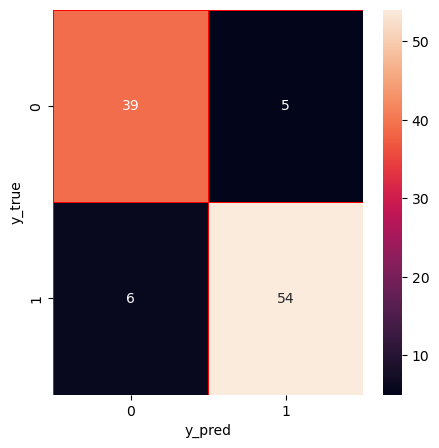

In [73]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# import sns
start_train = timeit.default_timer()
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### Part C

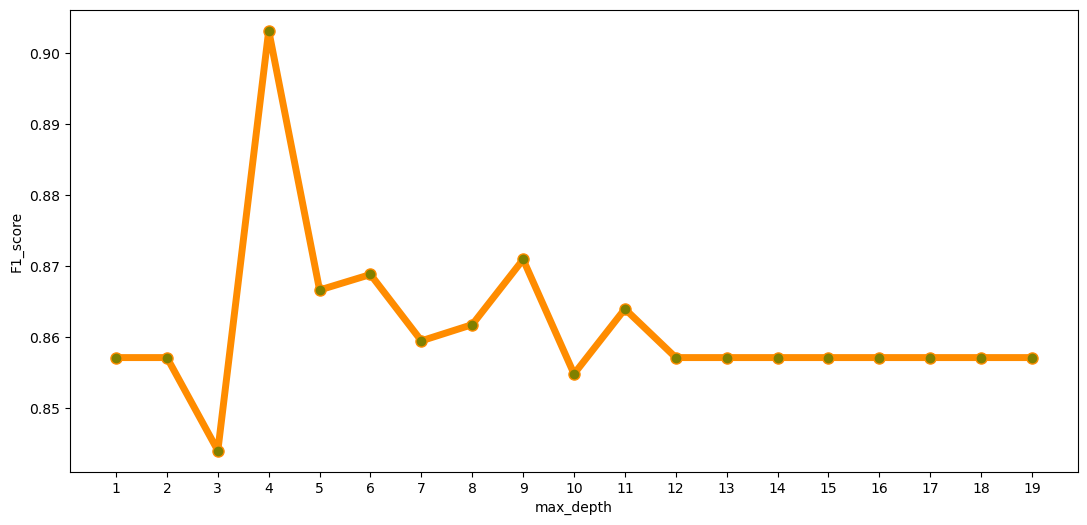

In [74]:
import matplotlib.ticker as ticker
error = []
tick_spacing = 1
for i in range(1,20):
    clf = DecisionTreeClassifier(max_depth =i, random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error.append(f1_score(y_test, y_pred))

fig, ax = plt.subplots(1, 1,figsize=(13,6))
plt.plot(range(1,20),error,color = 'darkorange',linewidth=5,marker='o', markersize=8,markerfacecolor='olive')
plt.xlabel('max_depth')
plt.ylabel('F1_score')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

### Cross-validation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth =4, random_state = 20))
strtfdKFold = StratifiedKFold(n_splits=120)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [259 320], Accuracy: 1.000
Fold:  2, Training/Test Split Distribution: [259 320], Accuracy: 1.000
Fold:  3, Training/Test Split Distribution: [259 320], Accuracy: 1.000
Fold:  4, Training/Test Split Distribution: [259 320], Accuracy: 0.600
Fold:  5, Training/Test Split Distribution: [259 320], Accuracy: 0.800
Fold:  6, Training/Test Split Distribution: [259 320], Accuracy: 0.600
Fold:  7, Training/Test Split Distribution: [259 320], Accuracy: 0.800
Fold:  8, Training/Test Split Distribution: [259 320], Accuracy: 0.800
Fold:  9, Training/Test Split Distribution: [259 320], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [259 320], Accuracy: 0.800
Fold: 11, Training/Test Split Distribution: [259 320], Accuracy: 0.600
Fold: 12, Training/Test Split Distribution: [259 320], Accuracy: 0.800
Fold: 13, Training/Test Split Distribution: [259 320], Accuracy: 1.000
Fold: 14, Training/Test Split Distribution: [259 320], Accuracy: 1.000
Fold: 

In [76]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier(max_depth =4, random_state = 20)
scores = cross_val_score(model,normalized_x, y_binary, scoring='accuracy', cv=383, n_jobs=-1)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


Cross Validation accuracy: 0.871 +/- 0.242


train time:  3671.7
test time:  1332.1
Accuracy:  0.8846153846153846
Precision:  0.875
recall_score:  0.9333333333333333
F1_score:  0.9032258064516129


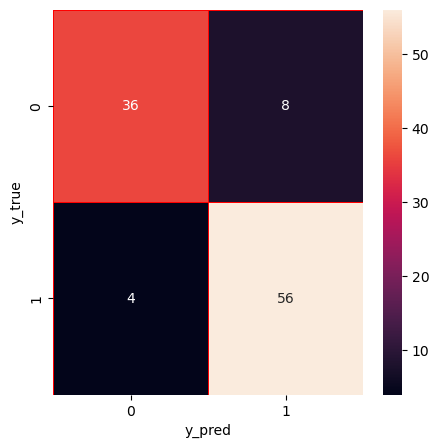

In [77]:
start_train = timeit.default_timer()
clf = DecisionTreeClassifier(max_depth =4, random_state = 20)
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()








### Part D

train time:  204004.2
test time:  15658.0
Accuracy:  0.8942307692307693
Precision:  0.9152542372881356
recall_score:  0.9
F1_score:  0.9075630252100839


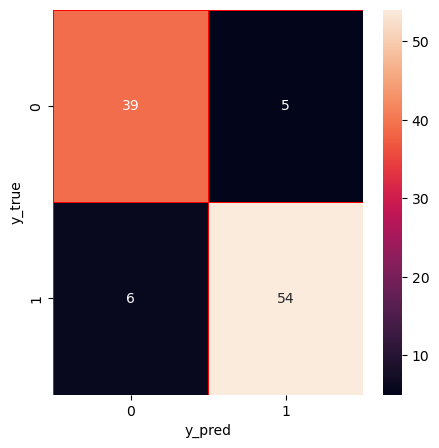

In [78]:
start_train = timeit.default_timer()
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)

end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




In [79]:
start_grid = timeit.default_timer()
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf': [4,8,12,15,20,25,30],
    'min_samples_split': [50,100,150,200,250,300],
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
end_grid = timeit.default_timer()
grid_search.best_params_




# print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 50}

Gridsearch time:  62120319.9
train time:  1431.8
test time:  36216.1
Accuracy:  0.9230769230769231
Precision:  0.8939393939393939
recall_score:  0.9833333333333333
F1_score:  0.9365079365079364


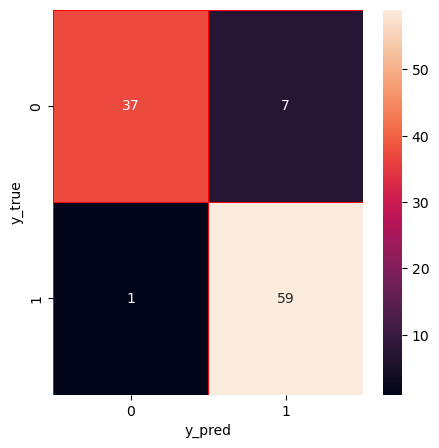

In [80]:
print("Gridsearch time: ", round((end_grid - start_grid) * 10 ** 6, 3))
start_train = timeit.default_timer()
best_grid = grid_search.best_estimator_
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = grid_search.best_estimator_.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )

print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()





### Part E

train time:  3908.8
test time:  3096.5
Accuracy:  0.8269230769230769
Precision:  0.7837837837837838
recall_score:  0.9666666666666667
F1_score:  0.8656716417910447


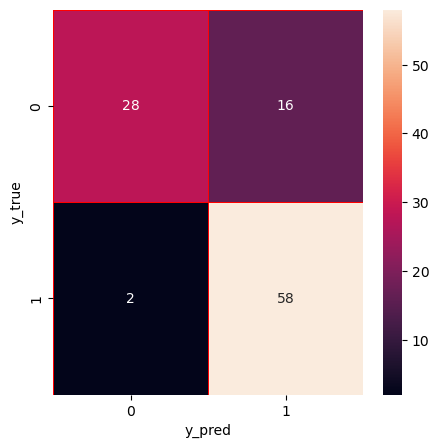

In [81]:
start_train = timeit.default_timer()
clf = GaussianNB()
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)

end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




### Part F

train time:  10501.1
test time:  2575.2
Accuracy:  0.875
Precision:  0.9272727272727272
recall_score:  0.85
F1_score:  0.8869565217391303


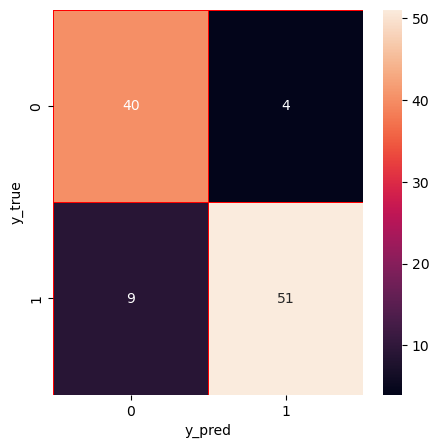

In [82]:
start_train = timeit.default_timer()
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




### Part G

In [83]:
param_grid = {'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf','polynomial','linear']}
start_grid = timeit.default_timer()
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
end_grid = timeit.default_timer()
grid.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.855 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.879 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ......C=1, gamm

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.821 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.871 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.855 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.879 total time=   0.0s
[CV 1/5] END ........C=

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [84]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

Gridsearch time:  6761299.5
train time:  26250.6
test time:  8299.8
Accuracy:  0.8942307692307693
Precision:  0.9298245614035088
recall_score:  0.8833333333333333
F1_score:  0.905982905982906


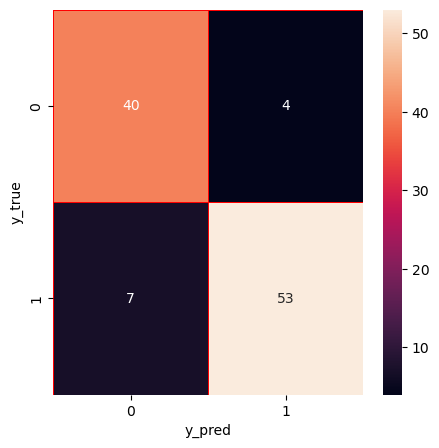

In [94]:
print("Gridsearch time: ", round((end_grid - start_grid) * 10 ** 6, 3))
start_train = timeit.default_timer()
clf =SVC(C = 1, gamma= 0.001, kernel= 'rbf' )
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()







### Part h

train time:  115218.2
test time:  10883.4
Accuracy:  0.875
Precision:  0.8852459016393442
recall_score:  0.9
F1_score:  0.8925619834710743


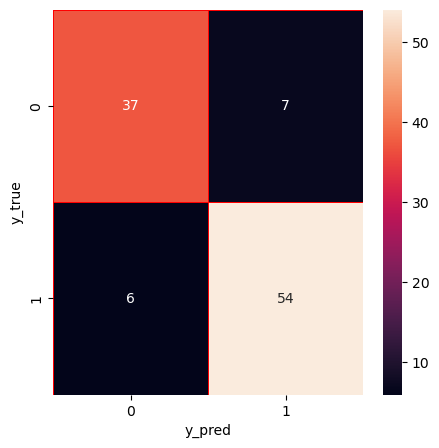

In [92]:
start_train = timeit.default_timer()
clf = AdaBoostClassifier(n_estimators=50, random_state=0)
clf.fit(X_train, y_train)
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = clf.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### Part i

train time:  63674.2
test time:  96010.6
Accuracy:  0.47115384615384615
Precision:  0.47115384615384615
recall_score:  0.7666666666666667
F1_score:  0.6258503401360546


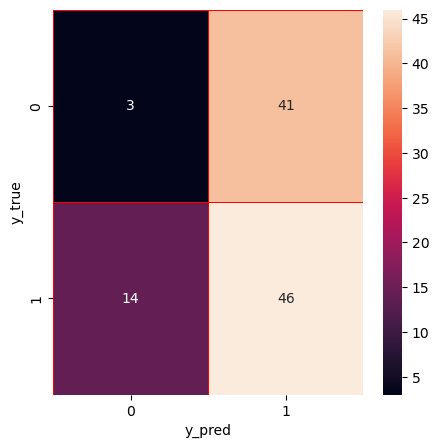

In [99]:
from sklearn.cluster import KMeans 
start_train = timeit.default_timer()
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0) 
km.fit(X_train) 
end_train = timeit.default_timer()
start_test = timeit.default_timer()
y_pred = km.predict(X_test)
end_test = timeit.default_timer()
print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred,average ='micro'))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Part K

train time:  63674.2
test time:  96010.6
Accuracy:  0.9565217391304348
Precision:  0.9387755102040817
recall_score:  1.0
F1_score:  0.968421052631579


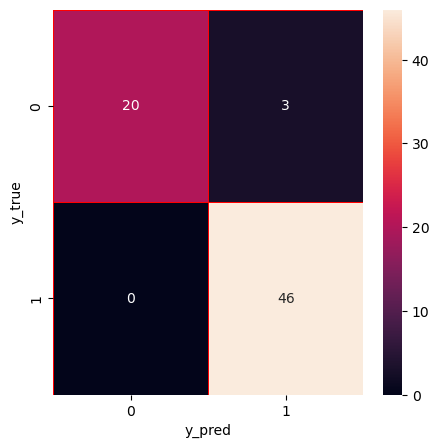

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 250,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 150,
 'verbose': 0}

In [152]:
param_grid = {
    'n_estimators': [150],
              'criterion':['gini'],
              'max_depth': [250],
    'min_samples_split':[6],
    'min_samples_leaf':[5],
    'min_weight_fraction_leaf':[0],
    'max_features' : ['sqrt'],
    'verbose' : [0],
    'class_weight': ['balanced'],
}

start_grid = timeit.default_timer()
grid = GridSearchCV(RandomForestClassifier(bootstrap=True), param_grid)
grid.fit(X_train, y_train)
end_grid = timeit.default_timer()
y_pred = grid_search.best_estimator_.predict(X_test)


print("train time: ", round((end_train - start_train) * 10 ** 6, 3))
print("test time: ", round((end_test - start_test) * 10 ** 6, 3) )
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1_score: ",f1_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(confusion,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

grid.best_params_